# Image Classification using LeNet-5

## Archtecture 
![](images/LeNet-5.png)

## Activation Function
tanh

## [Fully Connection VS. Gaussian Connection](https://medium.com/mlearning-ai/what-exactly-is-the-gaussian-connection-f0f09cbbe65e)
* Gaussian Connection: The output will not be plugged into any activation function
* Full Connection: The output will be plugged into a activation function

## Import Packages

In [20]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import numpy as np
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd

## Load data and data preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
x_cv = x_train[0:10000, :, :]
x_train = x_train[10000:60000, :, :]
y_cv = y_train[0:10000]
y_train = y_train[10000:60000]

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_cv shape: {x_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")

x_train shape: (50000, 28, 28)
y_train shape: (50000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
x_cv shape: (10000, 28, 28)
y_cv shape: (10000,)


Image shows 5


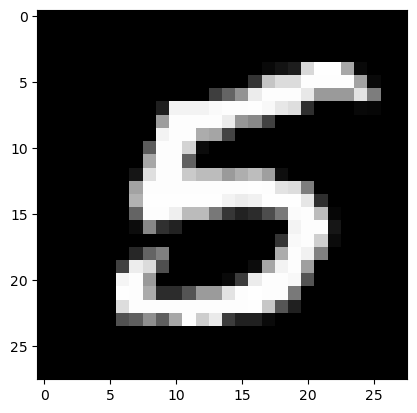

In [5]:
x_cv = x_train[0:10000, :, :]
x_train = x_train[10000:60000, :, :]
y_cv = y_train[0:10000]
y_train = y_train[10000:60000]



img = x_train[0]
plt.imshow(img, 'gray')
print(f"Image shows {y_train[0]}")

In [6]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

## Build LeNet-5

In [7]:
lenet_5 = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    # convolutions
    tfl.Conv2D(filters = 6,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='same',
               activation ='tanh'),
    
    # subsampling
    tfl.AveragePooling2D(pool_size = (2, 2),
                         strides = (2, 2),
                         padding ='valid'),
    
    # convolutions
    tfl.Conv2D(filters = 16,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='valid',
               activation ='tanh'),
    
    # subsampling
    tfl.AveragePooling2D(pool_size = (2, 2),
                         padding ='valid',
                        strides = (2, 2)),
    
    # convolutions
    tfl.Conv2D(filters = 120,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='valid',
               activation ='tanh'),
    
    tfl.Flatten(),
    
    tfl.Dense(units = 80, activation ='tanh'),
    
    tfl.Dense(units = 10, activation ='softmax')
        ])

2023-07-26 17:07:32.817768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-26 17:07:32.817812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
for layer in lenet_5.layers:
    print(layer)

In [9]:
lenet_5.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [10]:
lenet_5.fit(x_train, 
            y_train, 
            epochs = 5, 
            validation_data = (x_cv, y_cv))

Epoch 1/5


2023-07-26 17:07:33.565948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-26 17:07:33.619333: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


1250/1250 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.9174

2023-07-26 17:07:49.474716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 18s 14ms/step - loss: 0.2805 - accuracy: 0.9174 - val_loss: 0.1730 - val_accuracy: 0.9473
Epoch 2/5
1250/1250 [==============================] - 17s 13ms/step - loss: 0.1044 - accuracy: 0.9681 - val_loss: 0.1400 - val_accuracy: 0.9546
Epoch 3/5
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.1103 - val_accuracy: 0.9670
Epoch 4/5
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.0943 - val_accuracy: 0.9716
Epoch 5/5
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.1127 - val_accuracy: 0.9674


## Model Evaluation

<Axes: >

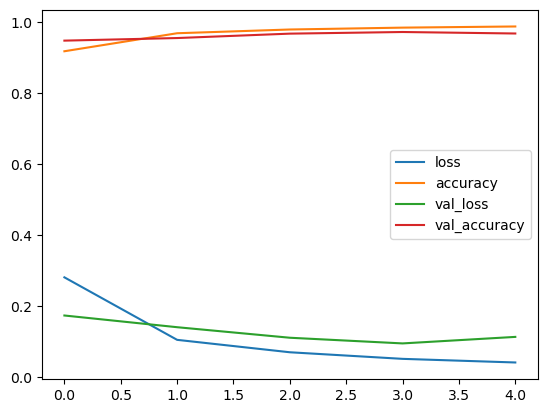

In [11]:
model_loss = pd.DataFrame(lenet_5.history.history)
model_loss.plot()

In [12]:
lenet_5.evaluate(x_test, y_test)

  8/313 [..............................] - ETA: 2s - loss: 0.0259 - accuracy: 0.9922 

2023-07-26 17:08:58.131111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.0638 - accuracy: 0.9813


[0.06382226198911667, 0.9812999963760376]

### Overfitting does not happen

## Predict a picture

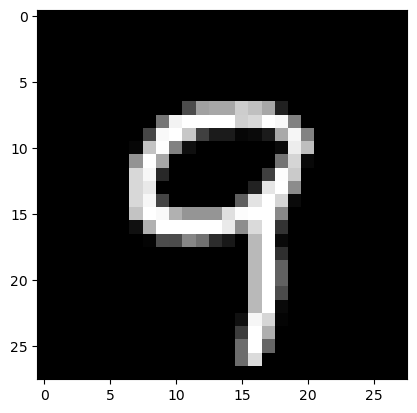

In [23]:
img = x_test[105]
plt.imshow(img, 'gray')

In [24]:
def predict(img, model):
    img_batch = np.array([img])
    yhat = model.predict(img_batch)
    return np.argmax(yhat)

print(f"Prediction is: {predict(img, lenet_5)}")

1/1 [==============================] - 0s 25ms/step
Prediction is: 9
